# I.i Data Handling

### Pandas
https://pandas.pydata.org/ <br>
High performance time series analytic package 
<img src="res/pandas_logo.png" height="300px">

In [1]:
import pandas

#### TUNGV Dataset

In [2]:
bus_csv_file_path = '/mnt/d/Datasets/tungv/csv/bus_1_positions.csv'

In [3]:
!head $bus_csv_file_path

,bus,latitude,longitude,signalStrength,speed,updateOn
0,1,14.07236194,100.60170745,26.0,2.914989,2014-11-10 07:00:52.791
1,1,14.07230186,100.60169982,23.0,4.164864,2014-11-10 07:00:54.105
2,1,14.07226657,100.60170745,23.0,4.674174,2014-11-10 07:00:55.370
3,1,14.07222557,100.60170745,23.0,5.475007,2014-11-10 07:00:56.675
4,1,14.0721302,100.60171508,23.0,7.076048,2014-11-10 07:00:57.983
5,1,14.07206916,100.60171508,23.0,7.281409,2014-11-10 07:00:59.283
6,1,14.07200336,100.60172271,23.0,7.053061,2014-11-10 07:01:00.575
7,1,14.07193946,100.60172271,21.0,7.038307,2014-11-10 07:01:01.886
8,1,14.07181072,100.60173034,21.0,7.728535,2014-11-10 07:01:03.201


In [4]:
bus_trajectory_dataframe = pandas.read_csv(bus_csv_file_path, parse_dates=['updateOn'], infer_datetime_format=True, index_col=0)

In [5]:
bus_trajectory_dataframe.head()

bus   latitude   longitude  signalStrength     speed  \
0    1  14.072362  100.601707            26.0  2.914989   
1    1  14.072302  100.601700            23.0  4.164864   
2    1  14.072267  100.601707            23.0  4.674174   
3    1  14.072226  100.601707            23.0  5.475007   
4    1  14.072130  100.601715            23.0  7.076048   

                 updateOn  
0 2014-11-10 07:00:52.791  
1 2014-11-10 07:00:54.105  
2 2014-11-10 07:00:55.370  
3 2014-11-10 07:00:56.675  
4 2014-11-10 07:00:57.983

In [6]:
bus_trajectory_dataframe.dtypes

bus                        int64
latitude                 float64
longitude                float64
signalStrength           float64
speed                    float64
updateOn          datetime64[ns]
dtype: object

In [7]:
bus_trajectory_dataframe.describe()

bus       latitude      longitude  signalStrength          speed
count  833273.0  833273.000000  833273.000000   833266.000000  833273.000000
mean        1.0      14.074351     100.629192       24.412374       4.218191
std         0.0       0.063483       1.013325        3.920955       2.882333
min         1.0      14.063493     100.588966        0.000000       0.000000
25%         1.0      14.068050     100.598328       22.000000       2.102482
50%         1.0      14.072751     100.601494       24.000000       3.956589
75%         1.0      14.076386     100.602097       27.000000       6.207655
max         1.0      16.401981     137.250061       31.000000      31.974989

In [8]:
bus_trajectory_dataframe.set_index('updateOn', inplace=True)

In [9]:
bus_trajectory_dataframe.resample('1T').mean().head()

bus   latitude   longitude  signalStrength     speed
updateOn                                                                 
2014-11-10 07:00:00  1.0  14.072226  100.601709       23.500000  5.264415
2014-11-10 07:01:00  1.0  14.071001  100.601740       26.378378  3.312322
2014-11-10 07:02:00  1.0  14.070424  100.600955       24.666667  4.330977
2014-11-10 07:03:00  1.0  14.070877  100.598590       23.409091  3.790738
2014-11-10 07:04:00  1.0  14.071385  100.597508       22.000000  3.344605

In [10]:
bus_trajectory_dataframe.memory_usage()

Index             6666184
bus               6666184
latitude          6666184
longitude         6666184
signalStrength    6666184
speed             6666184
dtype: int64

### Dask
https://dask.pydata.org/ <br>
Flexible parallel computing packeage 
<img src="res/dask.jpg" width="200px">


In [11]:
import dask.dataframe

#### Geolife Dataset

In [12]:
geolife_data_folder_path = "/mnt/d/Datasets/geolife/data/"

In [13]:
# Searching for the largest folder

In [16]:
!du -d 1  $geolife_data_folder_path | cut -f1,2 | sort -r -k1 -n | head -5 | tail -4

147229	/mnt/d/Datasets/geolife/data/153
85298	/mnt/d/Datasets/geolife/data/128
71406	/mnt/d/Datasets/geolife/data/041
69132	/mnt/d/Datasets/geolife/data/017


In [54]:
geolife_trajectories_folder_path = "/mnt/d/Datasets/geolife/data/017/Trajectory/"

In [55]:
# Number of individual files in the folder

In [56]:
!ls $geolife_trajectories_folder_path | wc -l

391


In [57]:
# Checking the format of the files

In [58]:
!head $geolife_trajectories_folder_path$(ls $geolife_trajectories_folder_path | tail -2 | head -1 ) | cat -n 

In [59]:
!head $geolife_trajectories_folder_path$(ls $geolife_trajectories_folder_path | tail -1 | head -1 ) | cat -n 

In [60]:
# Loading all files in the trajectory in a lazy manner
geolife_trajectories_dataframe = dask.dataframe.read_csv(geolife_trajectories_folder_path + "*.plt"
                                                       , skiprows=6, header=None, parse_dates=[[5, 6]])

In [61]:
geolife_trajectories_dataframe.head()

5_6          0           1  2      3             4
0 2008-10-30 09:27:48  39.986477  116.320150  0  147.6  39751.394306
1 2008-10-30 09:27:49  39.986480  116.320185  0  147.6  39751.394317
2 2008-10-30 09:27:52  39.986457  116.320282  0  147.6  39751.394352
3 2008-10-30 09:27:55  39.986528  116.320337  0  147.6  39751.394387
4 2008-10-30 09:27:58  39.986525  116.320427  0  147.6  39751.394421

#### Assigning columns' titles

In [62]:
geolife_trajectories_dataframe.columns = ['date_time', 'lat', 'lon', 'dummy', 'alt', 'date']
geolife_trajectories_dataframe.head()

date_time        lat         lon  dummy    alt          date
0 2008-10-30 09:27:48  39.986477  116.320150      0  147.6  39751.394306
1 2008-10-30 09:27:49  39.986480  116.320185      0  147.6  39751.394317
2 2008-10-30 09:27:52  39.986457  116.320282      0  147.6  39751.394352
3 2008-10-30 09:27:55  39.986528  116.320337      0  147.6  39751.394387
4 2008-10-30 09:27:58  39.986525  116.320427      0  147.6  39751.394421

#### Setting index

In [63]:
geolife_trajectories_dataframe = geolife_trajectories_dataframe.set_index('date_time')
geolife_trajectories_dataframe.head()

lat         lon  dummy    alt          date
date_time                                                             
2008-10-30 09:27:48  39.986477  116.320150      0  147.6  39751.394306
2008-10-30 09:27:49  39.986480  116.320185      0  147.6  39751.394317
2008-10-30 09:27:52  39.986457  116.320282      0  147.6  39751.394352
2008-10-30 09:27:55  39.986528  116.320337      0  147.6  39751.394387
2008-10-30 09:27:58  39.986525  116.320427      0  147.6  39751.394421

In [64]:
geolife_trajectories_dataframe

Dask DataFrame Structure:
                         lat      lon  dummy      alt     date
npartitions=391                                               
2008-10-30 09:27:48  float64  float64  int64  float64  float64
2008-10-30 11:27:22      ...      ...    ...      ...      ...
...                      ...      ...    ...      ...      ...
2009-07-04 06:35:54      ...      ...    ...      ...      ...
2009-07-04 12:08:32      ...      ...    ...      ...      ...
Dask Name: sort_index, 2346 tasks

In [65]:
geolife_trajectories_dataframe.describe().compute()

lat           lon      dummy           alt          date
count  1.026179e+06  1.026179e+06  1026179.0  1.026179e+06  1.026179e+06
mean   4.002311e+01  1.164136e+02        0.0  2.414577e+02  3.987978e+04
std    2.184594e-01  2.485517e-01        0.0  8.708249e+02  7.113825e+01
min    2.446898e+01  1.157098e+02        0.0 -2.555450e+04  3.975139e+04
25%    3.996565e+01  1.163469e+02        0.0  1.509000e+02  3.983712e+04
50%    3.998596e+01  1.163808e+02        0.0  1.804000e+02  3.991328e+04
75%    4.098870e+01  1.428795e+02        0.0  3.123400e+03  3.999837e+04
max    4.099612e+01  1.428796e+02        0.0  2.685700e+04  3.999851e+04

In [66]:
geolife_trajectories_dataframe.memory_usage(deep=True).compute()

Index    8209432
alt      8209432
date     8209432
dummy    8209432
lat      8209432
lon      8209432
dtype: int64

In [67]:
geolife_trajectories_dataframe.dtypes

lat      float64
lon      float64
dummy      int64
alt      float64
date     float64
dtype: object

#### Bangkok Taxis Dataset

In [26]:
taxis_trajectories_file_path = '/mnt/d/Datasets/bangkok_taxi/csv/gps_20131225.csv'

In [27]:
!du $taxis_trajectories_file_path -h | cut -f1

3.3G


In [28]:
taxis_trajectories_dataframe = dask.dataframe.read_csv(taxis_trajectories_file_path
                                                     , header=None)
taxis_trajectories_dataframe = taxis_trajectories_dataframe.set_index(0)

In [29]:
taxis_trajectories_dataframe.head()

1         2          3     4     5    6   7   8           9   \
0                                                                              
1  353419036143969  13.67845  100.43376  67.0  59.4  2.1   0   0  1387904402   
2  353419036143969  13.67862  100.43405  65.0  59.4  2.1   0   0  1387904405   
3         16005529  13.95858  100.36943   0.0   0.0  0.0   1   1  1387904400   
4         16014594  13.92542  100.68298   0.0   0.0  0.0   1   1  1387904400   
5         16005392  13.74467  100.53937   0.0   0.0  0.0   0   1  1387904400   

   10  
0      
1   8  
2   8  
3   9  
4   9  
5   9

In [30]:
taxis_trajectories_dataframe.columns = ['id', 'lat', 'lon', 'speed', 'f_1', 'f_2', 'f_3', 'f_4', 'seconds', 'f_5']

#### Conversion of seconds to datetime format

In [31]:
datetime_convert = dask.dataframe.to_datetime(taxis_trajectories_dataframe['seconds'] + (7 * 3600), unit='s')

#### Generating computation graph of function

In [34]:
#datetime_convert.visualize()

In [35]:
taxis_trajectories_dataframe['datetime'] = datetime_convert

In [36]:
taxis_trajectories_dataframe = taxis_trajectories_dataframe.drop_duplicates(subset=['id', 'seconds'])

#### Extracting taxis ids

In [37]:
taxis_ids = taxis_trajectories_dataframe.id.unique().compute()
taxis_ids.shape[0]

6617

In [38]:
sample_taxi_trajectory = taxis_trajectories_dataframe[taxis_trajectories_dataframe.id== taxis_ids[0]].compute()
sample_taxi_trajectory.head()

id       lat        lon  speed   f_1  f_2  f_3  f_4  \
0                                                                        
1     353419036143969  13.67845  100.43376   67.0  59.4  2.1    0    0   
2     353419036143969  13.67862  100.43405   65.0  59.4  2.1    0    0   
1555  353419036143969  13.67927  100.43520   64.0  61.4  1.8    0    0   
1556  353419036143969  13.67943  100.43550   67.0  61.1  1.6    0    0   
1557  353419036143969  13.67959  100.43580   70.0  60.7  1.6    0    0   

         seconds  f_5            datetime  
0                                          
1     1387904402    8 2013-12-25 00:00:02  
2     1387904405    8 2013-12-25 00:00:05  
1555  1387904408    8 2013-12-25 00:00:08  
1556  1387904411    8 2013-12-25 00:00:11  
1557  1387904414    8 2013-12-25 00:00:14

### GeoPandas
http://geopandas.org/<br>
GeoSpatial data handling tool package

In [43]:
import shapely
import geopandas
from matplotlib import pyplot
%matplotlib inline

#### Handling Geospatial Datasets

In [44]:
sample_cities_dataframe = geopandas.read_file("data/geopandas/sample_cities/sample_cities.shp")

In [45]:
sample_cities_dataframe.head()

bbox_east  bbox_north  bbox_south    bbox_west place_name  \
0    135.59935   34.768849   34.586154  135.3099784      Osaka   
1  100.9384449  13.9551875  13.2166667  100.3278772    Bangkok   
2  141.2603046   38.454699  38.0508487   140.469472     Sendai   

                                            geometry  
0  POLYGON ((135.3099784 34.6265868, 135.3297266 ...  
1  POLYGON ((100.3278772 13.8041844, 100.3318503 ...  
2  POLYGON ((140.469472 38.256414, 140.469472 38....

In [46]:
world_dataframe = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world_dataframe.head()

pop_est      continent                  name iso_a3  gdp_md_est  \
0  28400000.0           Asia           Afghanistan    AFG     22270.0   
1  12799293.0         Africa                Angola    AGO    110300.0   
2   3639453.0         Europe               Albania    ALB     21810.0   
3   4798491.0           Asia  United Arab Emirates    ARE    184300.0   
4  40913584.0  South America             Argentina    ARG    573900.0   

                                            geometry  
0  POLYGON ((61.21081709172574 35.65007233330923,...  
1  (POLYGON ((16.32652835456705 -5.87747039146621...  
2  POLYGON ((20.59024743010491 41.85540416113361,...  
3  POLYGON ((51.57951867046327 24.24549713795111,...  
4  (POLYGON ((-65.50000000000003 -55.199999999999...

# I.ii Data Representations

#### 2d Cartesian Projections
Geometries's current projection could be queried using "crs" property of the dataframe. <br>
Reprojection is done by "to_crs" method.<br> 
The projection standards are recognised by identifiers. For instance, one identifier for Mercator is 'epsg:3857' and projection from WGS84 is:
$$w=2\pi r\\x=\frac{w}{2\pi} \lambda\\
y=\frac{w}{2\pi} log[tan(\frac{\pi}{4}+\frac{\phi}{2})]\\
$$
where $\lambda$ is the longitude and $\phi$ is latitude.

Platee Carrée or flat square projection is simple flattening of WGS84 latitudes, longitudes:
$$x=(\lambda - \lambda_0)\cos \phi_0\\
y=(\phi - \phi_0)
$$
where $\lambda_0$ is the origin's longitude and $\phi_0$ is true scale parallel's latitude.

Countries dataset's projection: {'init': 'epsg:4326'}


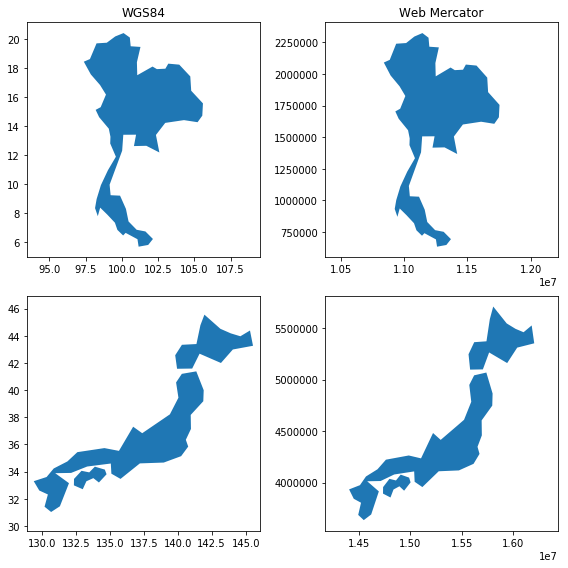

In [47]:
print("Countries dataset's projection:", world_dataframe.crs)

# Reprojecting the points to Web Mercator
world_dataframe_mercator = world_dataframe.to_crs({'init': 'epsg:3857'})

fig = pyplot.figure(figsize=(8,8))
axes = fig.subplots(2,2)
world_dataframe[world_dataframe.name=='Thailand'].plot(ax=axes[0,0])
world_dataframe_mercator[world_dataframe_mercator.name=='Thailand'].plot(ax=axes[0,1])
world_dataframe[world_dataframe.name=='Japan'].plot(ax=axes[1,0])
world_dataframe_mercator[world_dataframe_mercator.name=='Japan'].plot(ax=axes[1,1])
axes[0,0].set_title('WGS84')
axes[0,0].axis('equal')
axes[0,1].axis('equal')
axes[0,1].set_title('Web Mercator')
axes[1,0].axis('equal')
axes[1,1].axis('equal')
pyplot.tight_layout(h_pad=0.5)
pyplot.show()

Sample cities default projection: {'init': 'epsg:4326'}


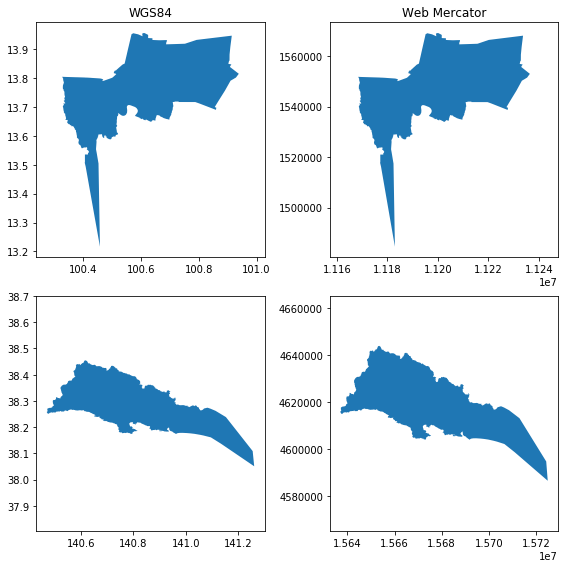

In [48]:
print("Sample cities default projection:", sample_cities_dataframe.crs)

# Reprojecting the points to Web Mercator
sample_cities_dataframe_mercator = sample_cities_dataframe.to_crs({'init': 'epsg:3857'})

fig = pyplot.figure(figsize=(8,8))
axes = fig.subplots(2,2)
sample_cities_dataframe[sample_cities_dataframe.place_name=='Bangkok'].plot(ax = axes[0,0])
sample_cities_dataframe_mercator[sample_cities_dataframe_mercator.place_name=='Bangkok'].plot(ax=axes[0,1])
sample_cities_dataframe[sample_cities_dataframe.place_name=='Sendai'].plot(ax = axes[1,0])
sample_cities_dataframe_mercator[sample_cities_dataframe_mercator.place_name=='Sendai'].plot(ax=axes[1,1])

axes[0,0].set_title('WGS84')
axes[0,0].axis('equal')
axes[0,1].axis('equal')
axes[0,1].set_title('Web Mercator')
axes[1,0].axis('equal')
axes[1,1].axis('equal')
pyplot.tight_layout(h_pad=0.5)
pyplot.show()

#### 3d Cartesian Projections
<ul>
    <li><a href="https://en.wikipedia.org/wiki/ECEF">ECEF</a></li>
    <li><a href="https://en.wikipedia.org/wiki/Axes_conventions">ENU</a></li>
    <li><a href="https://en.wikipedia.org/wiki/North_east_down">NED</a></li>
    <li><a href="http://www.navlab.net/nvector/">N-Vector</a></li>
    Gade, K. (2010) <a href="http://www.navlab.net/Publications/A_Nonsingular_Horizontal_Position_Representation.pdf"> Non-singular Horizontal Position Representation</a> The Journal of Navigation, Volume 63, Issue 03, pp 395-417, July 2010.
</ul>

#### N-Vector

WGS84 coordinates are transformed to N-Vector using equations below:
$$ \begin{bmatrix}x\\y\\z\end{bmatrix} = r_{earth}\begin{bmatrix}\cos{\phi}\cos{\lambda}\\\cos{\phi}\sin{\lambda}\\\sin{\phi}\end{bmatrix}\\
$$
These coordinates mapped back to WGS84 as:
$$\phi=\tan^{-1}{(z, \sqrt{x^2+y^2})}\\
\lambda=\tan^{-1}{(y, x)}
$$


In [49]:
import numpy
from utils import plot3d
from utils import legend
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [50]:
# Transforming lat/ lon to N-Vector
def lat_lon_to_nvector(coords):
    lat, lon = coords[:, 0], coords[:, 1]
    x = numpy.cos(numpy.deg2rad(lat)) * numpy.cos(numpy.deg2rad(lon))
    y = numpy.cos(numpy.deg2rad(lat)) * numpy.sin(numpy.deg2rad(lon))
    z = numpy.sin(numpy.deg2rad(lat))
    return numpy.hstack((x.reshape(-1, 1),y.reshape(-1, 1),z.reshape(-1, 1)))

In [51]:
sendai_centroid = sample_cities_dataframe.geometry[sample_cities_dataframe.place_name == 'Sendai'].centroid
osaka_centroid = sample_cities_dataframe.geometry[sample_cities_dataframe.place_name == 'Osaka'].centroid
coords = numpy.concatenate(([0.0, 0.0]\
                            , sendai_centroid.y.values, sendai_centroid.x.values\
                            , osaka_centroid.y.values, osaka_centroid.x.values)).reshape(-1,2)
sample_nvectors = lat_lon_to_nvector(coords)
sample_nvectors_dict = {"Origin":sample_nvectors[[0],:].T, "Sendai": sample_nvectors[[1],:].T, "Osaka": sample_nvectors[[2],:].T}
print("N-Vectors:\n", sample_nvectors)

N-Vectors:
 [[ 1.          0.          0.        ]
 [-0.60868038  0.49578384  0.61944054]
 [-0.58635485  0.57682689  0.56873432]]


In [52]:
o = sample_nvectors_dict["Sendai"]
o = o / numpy.linalg.norm(o) 
ecef = plot3d.EarthCenteredCoordinateFrame()
enu = plot3d.LocalTangentPlaneCoordinateFrame(o)
ned = plot3d.LocalTangentPlaneCoordinateFrame(o, enu=False)
origin_nvector = plot3d.NVector(sample_nvectors_dict["Origin"])
sendai_nvector = plot3d.NVector(sample_nvectors_dict["Sendai"])
osaka_nvector = plot3d.NVector(sample_nvectors_dict["Osaka"])

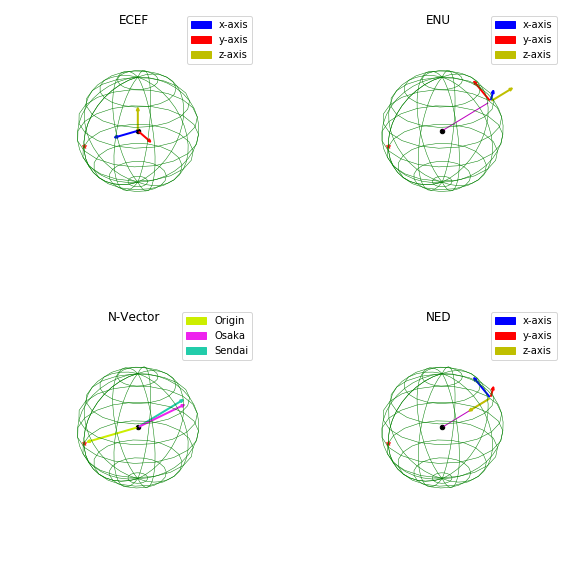

In [53]:
fig = pyplot.figure(figsize=(10,10))
axes = fig.subplots(2,2, subplot_kw={'projection': '3d'})
earth_sphere = plot3d.Sphere(1, 20)

# Earth Centered Earth Fixed (ECEF) Coordinate System
axes[0, 0].plot_wireframe(earth_sphere.x, earth_sphere.y, earth_sphere.z, lw=0.5, cstride=2, rstride=2, color='g')
axes[0, 0].scatter([0], [0], [0], color='k')
axes[0, 0].scatter(sample_nvectors_dict["Origin"][0], sample_nvectors_dict["Origin"][1]\
                   , sample_nvectors_dict["Origin"][2]\
                   , color='#FF2323', marker='*', s=20)
axes[0, 0].add_artist(ecef.x_basis_axis(lw=2, arrowstyle="-|>", color='b', mutation_scale=5))
axes[0, 0].add_artist(ecef.y_basis_axis(lw=2, arrowstyle="-|>", color='r', mutation_scale=5))
axes[0, 0].add_artist(ecef.z_basis_axis(lw=2, arrowstyle="-|>", color='y', mutation_scale=5))
axes[0, 0].view_init(30,60)
axes[0, 0].set_aspect('equal')
axes[0, 0].axis('off')
axes[0, 0].set_title('ECEF')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
axes[0, 0].set_zlabel('z')
axes[0, 0].legend(handles=legend.create_legend_labels([{'color':'b', 'label':'x-axis'}\
                                                       , {'color':'r', 'label':'y-axis'}\
                                                       , {'color':'y', 'label':'z-axis'}]))


# N-Vector Coordinate System
axes[1, 0].plot_wireframe(earth_sphere.x, earth_sphere.y, earth_sphere.z, lw=0.5, cstride=2, rstride=2, color='g')
axes[1, 0].scatter([0], [0], [0], color='k')
axes[1, 0].scatter(sample_nvectors_dict["Origin"][0], sample_nvectors_dict["Origin"][1]\
                   , sample_nvectors_dict["Origin"][2]\
                   , color='#FF2323', marker='*', s=20)
axes[1, 0].add_artist(sendai_nvector.nvector(lw=2, arrowstyle="-|>", color='#22CCAA', mutation_scale=5))
axes[1, 0].add_artist(origin_nvector.nvector(lw=2, arrowstyle="-|>", color='#CCEE00', mutation_scale=5))
axes[1, 0].add_artist(osaka_nvector.nvector(lw=2, arrowstyle="-|>", color='#EE22EE', mutation_scale=5))
axes[1, 0].view_init(30,60)
axes[1, 0].set_aspect('equal')
axes[1, 0].axis('off')
axes[1, 0].set_title('N-Vector')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')
axes[1, 0].set_zlabel('z')
axes[1, 0].legend(handles=legend.create_legend_labels([{'color':'#CCEE00', 'label':'Origin'}\
                                                       , {'color':'#EE22EE', 'label':'Osaka'}\
                                                       , {'color':'#22CCAA', 'label':'Sendai'}]))



# East North Up (ENU) Coordinate System
axes[0, 1].plot_wireframe(earth_sphere.x, earth_sphere.y, earth_sphere.z, lw=0.5, cstride=2, rstride=2, color='g')
axes[0, 1].scatter([0], [0], [0], color='k')
axes[0, 1].scatter(sample_nvectors_dict["Origin"][0], sample_nvectors_dict["Origin"][1]\
                   , sample_nvectors_dict["Origin"][2]\
                   , color='#FF2323', marker='*', s=20)
axes[0, 1].add_artist(enu.o_vector(lw=1, arrowstyle="-|>", color='m'))
axes[0, 1].add_artist(enu.x_basis_axis(lw=2, arrowstyle="-|>", color='b', mutation_scale=5))
axes[0, 1].add_artist(enu.y_basis_axis(lw=2, arrowstyle="-|>", color='r', mutation_scale=5))
axes[0, 1].add_artist(enu.z_basis_axis(lw=2, arrowstyle="-|>", color='y', mutation_scale=5))
axes[0, 1].view_init(30,60)
axes[0, 1].set_aspect('equal')
axes[0, 1].axis('off')
axes[0, 1].set_title('ENU')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')
axes[0, 1].set_zlabel('z')
axes[0, 1].legend(handles=legend.create_legend_labels([{'color':'b', 'label':'x-axis'}\
                                                       , {'color':'r', 'label':'y-axis'}\
                                                       , {'color':'y', 'label':'z-axis'}]))


# North East Down (NED) Coordinate System
axes[1, 1].plot_wireframe(earth_sphere.x, earth_sphere.y, earth_sphere.z, lw=0.5, cstride=2, rstride=2, color='g')
axes[1, 1].scatter([0], [0], [0], color='k')
axes[1, 1].scatter(sample_nvectors_dict["Origin"][0], sample_nvectors_dict["Origin"][1]\
                   , sample_nvectors_dict["Origin"][2]\
                   , color='#FF2323', marker='*', s=20)
axes[1, 1].add_artist(ned.o_vector(lw=1, arrowstyle="-|>", color='m'))
axes[1, 1].add_artist(ned.x_basis_axis(lw=2, arrowstyle="-|>", color='b', mutation_scale=5))
axes[1, 1].add_artist(ned.y_basis_axis(lw=2, arrowstyle="-|>", color='r', mutation_scale=5))
axes[1, 1].add_artist(ned.z_basis_axis(lw=2, arrowstyle="-|>", color='y', mutation_scale=5))
axes[1, 1].view_init(30,60)
axes[1, 1].set_aspect('equal')
axes[1, 1].axis('off')
axes[1, 1].set_title('NED')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')
axes[1, 1].set_zlabel('z')
axes[1, 1].legend(handles=legend.create_legend_labels([{'color':'b', 'label':'x-axis'}\
                                                       , {'color':'r', 'label':'y-axis'}\
                                                       , {'color':'y', 'label':'z-axis'}]))
pyplot.show()

# I.iii Data Preprocessing

## Noise Filtering

### Rolling Mean Filter and Median Filter


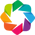

In [68]:
import warnings
import holoviews
import geoviews
from utils import projection, maps
from holoviews.operation import datashader
from datashader.colors import colormap_select, Hot, viridis, inferno
warnings.filterwarnings('ignore')
holoviews.extension('bokeh')


In [69]:
bus_trajectory_dataframe.head()

bus   latitude   longitude  signalStrength     speed
updateOn                                                                     
2014-11-10 07:00:52.791    1  14.072362  100.601707            26.0  2.914989
2014-11-10 07:00:54.105    1  14.072302  100.601700            23.0  4.164864
2014-11-10 07:00:55.370    1  14.072267  100.601707            23.0  4.674174
2014-11-10 07:00:56.675    1  14.072226  100.601707            23.0  5.475007
2014-11-10 07:00:57.983    1  14.072130  100.601715            23.0  7.076048

In [70]:
bus_trajectory_x_y = projection.mercator(bus_trajectory_dataframe.latitude, bus_trajectory_dataframe.longitude)

In [71]:
# Applying mean filter on data with window size of 10
mean_filtered_bus_trajectory = bus_trajectory_x_y.rolling(10).mean().fillna(method='bfill')

In [72]:
# Applying median filter on data with window size of 10
median_filtered_bus_trajectory = bus_trajectory_x_y.rolling(10).median().fillna(method='bfill')

In [73]:
%%opts WMTS [width=400, height=400, bgcolor='white', xaxis=None, yaxis=None]

mean_filtered_points = holoviews.Points(mean_filtered_bus_trajectory, kdims=['x', 'y'], label="Mean Filter")
median_filtered_points = holoviews.Points(median_filtered_bus_trajectory, kdims=['x', 'y'], label="Median Filter")
context_map = geoviews.WMTS(maps.Tiles['ESRI'])
mean_filtered_map = datashader.dynspread(datashader.datashade(mean_filtered_points, cmap=Hot))
median_filtered_map = datashader.dynspread(datashader.datashade(median_filtered_points, cmap=viridis))
context_map * mean_filtered_map + context_map * median_filtered_map

:Layout
   .DynamicMap.I  :DynamicMap   []
   .DynamicMap.II :DynamicMap   []

### Heuristics Filtering

#### Speed heuristic filtering

In [74]:
from utils import nvector
from utils import maps

Calculate time difference between consecutive points

In [75]:
bus_trajectory_dataframe["dt"] = numpy.concatenate(\
    ((bus_trajectory_dataframe.index[1:] - bus_trajectory_dataframe.index[:-1]).total_seconds(), [0]))

Calculate surface distance between consecutive points

In [76]:
bus_trajectory_nvectors = nvector.lat_lon_to_nvector(bus_trajectory_dataframe.latitude, bus_trajectory_dataframe.longitude)

In [77]:
bus_trajectory_dataframe["ds"] = numpy.concatenate(\
    (nvector.surface_distance((bus_trajectory_nvectors.as_matrix(['x', 'y', 'z'])[1:],\
                               bus_trajectory_nvectors.as_matrix(['x', 'y', 'z'])[:-1])), [[0]])) * maps.Datums["WGS84"]["a"]

In [78]:
bus_trajectory_dataframe.head()

bus   latitude   longitude  signalStrength     speed  \
updateOn                                                                        
2014-11-10 07:00:52.791    1  14.072362  100.601707            26.0  2.914989   
2014-11-10 07:00:54.105    1  14.072302  100.601700            23.0  4.164864   
2014-11-10 07:00:55.370    1  14.072267  100.601707            23.0  4.674174   
2014-11-10 07:00:56.675    1  14.072226  100.601707            23.0  5.475007   
2014-11-10 07:00:57.983    1  14.072130  100.601715            23.0  7.076048   

                            dt         ds  
updateOn                                   
2014-11-10 07:00:52.791  1.314   6.738629  
2014-11-10 07:00:54.105  1.265   4.013927  
2014-11-10 07:00:55.370  1.305   4.564099  
2014-11-10 07:00:56.675  1.308  10.648460  
2014-11-10 07:00:57.983  1.300   6.794942

In [79]:
ds_dt = bus_trajectory_dataframe.ds / bus_trajectory_dataframe.dt

In [80]:
ds_dt.describe()

count    833272.000000
mean          4.447199
std           3.904063
min           0.000000
25%           1.979359
50%           3.859428
75%           6.164154
max         926.863256
dtype: float64

Detecting speed outliers (ie. greater than 50 m/s)

In [81]:
spikes_start_indices = numpy.argwhere(ds_dt > 50)
spikes_end_indices = spikes_start_indices + 1
# extract outliers' coordinates
spikes_segments_vectors = numpy.hstack((bus_trajectory_x_y.x.values[spikes_start_indices]\
              , bus_trajectory_x_y.x.values[spikes_end_indices]\
              , bus_trajectory_x_y.y.values[spikes_start_indices]\
              , bus_trajectory_x_y.y.values[spikes_end_indices]))
spikes_segments_vectors.shape

(44, 4)

In [82]:
%%opts Curve [width=400, height=400, xaxis=None, yaxis=None ] 
context_map = geoviews.WMTS(maps.Tiles['ESRI'])
raw_points = holoviews.Points(bus_trajectory_x_y, kdims=['x', 'y'], label="Raw")
unfiltered_map = datashader.dynspread(datashader.datashade(raw_points, cmap=Hot))
segments_map = None
for i in range(spikes_segments_vectors.shape[0]):
    if segments_map is None:
        segments_map = holoviews.Curve((spikes_segments_vectors[i,:2], spikes_segments_vectors[i, 2:] ))
    else:
        segments_map *= holoviews.Curve((spikes_segments_vectors[i,:2], spikes_segments_vectors[i, 2:] ))
        
context_map * unfiltered_map * segments_map

:DynamicMap   []

#### Filtering using GeoSpatial Boundaries

Loading area's map

In [83]:
pathum_thani_dataframe = geopandas.read_file('data/geopandas/pathum_thani/pathum_thani.shp')

In [84]:
pathum_thani_dataframe.head()

bbox_east  bbox_north  bbox_south    bbox_west    place_name  \
0  100.9520756  14.2760491  13.9162736  100.3315823  Pathum Thani   

                                            geometry  
0  POLYGON ((100.3315823 14.0563157, 100.3320182 ...

In [85]:
pathum_thani_dataframe.geometry.crs

{'init': 'epsg:4326'}

Converting bus trajectory points to GeoSeries

In [86]:
bus_trajectroy_points_geometry = [shapely.geometry.Point(*coord) for coord in bus_trajectory_dataframe.as_matrix(['longitude', 'latitude'])]
bus_trajectroy_geoseries = geopandas.GeoSeries(bus_trajectroy_points_geometry, crs=pathum_thani_dataframe.geometry.crs)

In [87]:
map_filter_mask = bus_trajectroy_geoseries.intersects(pathum_thani_dataframe.geometry.unary_union)

Masking trajectory points

In [88]:
map_filtered_bus_trajectory = bus_trajectory_x_y[map_filter_mask.values]

In [89]:
%%opts WMTS [width=400, height=400, bgcolor='white', xaxis=None, yaxis=None]

raw_points = holoviews.Points(bus_trajectory_x_y, kdims=['x', 'y'], label="Raw")
map_filtered_points = holoviews.Points(map_filtered_bus_trajectory, kdims=['x', 'y'], label="Geometry Filter")
context_map = geoviews.WMTS(maps.Tiles['ESRI'])
unfiltered_map = datashader.dynspread(datashader.datashade(raw_points, cmap=Hot))
map_filtered_map = datashader.dynspread(datashader.datashade(map_filtered_points, cmap=viridis))
context_map * unfiltered_map + context_map * map_filtered_map

:Layout
   .DynamicMap.I  :DynamicMap   []
   .DynamicMap.II :DynamicMap   []

### Kalman filters

#### Ensemble Kalman filter
Katzfuss M, Stroud JR, Wikle CK. <a href="http://www.jonathanrstroud.com/papers/enkf-tutorial.pdf">Understanding the ensemble Kalman filter.</a> The American Statistician. 2016 Oct 1;70(4):350-7.

##### Kalman filter
$$\\
\mathbf{x}_t=\mathbf{M}_t\mathbf{x}_{t-1} + \mathbf{w}_t, \quad \mathbf{w}_t \sim\mathcal{N}(\mathbf{0},\, \mathbf{Q}_t)\\
\mathbf{y}_t=\mathbf{H}_t\mathbf{x}_t + \mathbf{v}_t, \quad \mathbf{v}_t\sim\mathcal{N}(\mathbf{0},\,\mathbf{R}_t),\\
$$
given
$$\\
\mathbf{x}_{t-1}|\mathbf{y}_{1:t-1}\sim \mathcal{N}(\mathbf{\hat{\mu}}_{t-1},\,\mathbf{\hat{\Sigma}}_{t-1} )\\
$$
forecast
$$\\
\mathbf{x}_{t}|\mathbf{y}_{1:t-1}\sim \mathcal{N}(\tilde{\mathbf{\mu}}_t,\, \tilde{\mathbf{\Sigma}}_t)\\
\mathbf{\tilde{\mu}}_t = \mathbf{M}_t\mathbf{\hat{\mu}}_{t-1},\\
\mathbf{\tilde{\Sigma}}_t = \mathbf{M}_t\mathbf{\hat{\Sigma}}_{t-1}\mathbf{M}_t^T + \mathbf{Q}_t
$$
update
$$\\
\mathbf{\hat{\mu}}_t = \mathbf{\tilde{\mu}}_t + \mathbf{\tilde{\Sigma}}_t \mathbf{H}^T(\mathbf{H}_t\mathbf{\tilde{\Sigma}}_t\mathbf{H}_t^T + \mathbf{R}_t)^{-1}(\mathbf{y}_t - \mathbf{H}_t\mathbf{\tilde{\mu}}_t)\\
\mathbf{\hat{\Sigma}}= (\mathbf{I} - \mathbf{\tilde{\Sigma}}_t \mathbf{H}^T(\mathbf{H}_t\mathbf{\tilde{\Sigma}}_t\mathbf{H}_t^T + \mathbf{R}_t)^{-1}\mathbf{H}_t)\mathbf{\tilde{\Sigma}}_t
$$

##### Ensemble Kalman filter
for $X$ as $N$ ensemble of $\mathbb{R}^d$<br> 
predict
$$\\
\mathbf{\tilde{X}}_t = \mathbf{M}_t\mathbf{\hat{X}}_{t-1} + \mathbf{W}_t
$$

update
$$\\
\mathbf{\hat{X}}_t = \mathbf{\tilde{X}}_t+\mathbf{\hat{K}}_t(\mathbf{Y}_t+\mathbf{V}_t-\mathbf{H}_t\mathbf{\tilde{X}}_t)\\
\mathbf{\hat{K}}_t = \mathbf{\tilde{S}}_t\mathbf{H}^T_t(\mathbf{H}_t\mathbf{\tilde{S}}_t\mathbf{H}^T_t+\mathbf{R}_t)^{-1}\\
$$


### Particle filters

#### SIR Particle Filter

Doucet A, Johansen AM. <a href="https://www.stats.ox.ac.uk/~doucet/doucet_johansen_tutorialPF2011.pdf">A tutorial on particle filtering and smoothing: Fifteen years later.</a> Handbook of nonlinear filtering. 2009 Dec;12(656-704):3.

$$\mathbf{W}^+ = \prod_{d \in D} p(\mathbf{x}^-_d|z)\\
\hat{\mathbf{W}^+}= \frac{\mathbf{W}^+}{\sum_{n \in N}{w^+_n}}$$

In [90]:
class SIRPF(object):
    """
    2d particle filter with resampling using wheel method 
    """
    def __init__(self, n_particles,measurement_noise, transition_noise\
                 , initial_state=None, initial_velocity=None, space_boundaries=None, dt=1.):
        self._Q = transition_noise
        self._R = measurement_noise
        self._n_particles = n_particles
        self._h = dt
        
        self._weights = numpy.ones((self._n_particles,1)) / self._n_particles
        if initial_state is not None:
            self._measurement_memory = initial_state
            self._particles = numpy.dot(numpy.random.rand(n_particles, 2), numpy.diag(self._R)) + initial_state
        elif space_boundaries is not None:
            self._measurement_memory = None
            self._boundaries = space_boundaries
            self.__sample()
        else:
            raise ValueError("No information about state space is provided!")
            
        if initial_velocity is None:
            self._velocity = numpy.zeros((1, 2))
        else:
            self._velocity = initial_velocity
        

    def __sample(self):
        self._particles = numpy.hstack((numpy.random.uniform(self._boundaries[0, 0]\
                                                             , self._boundaries[1, 0]\
                                                             , (self._n_particles, 1))\
                                        , numpy.random.uniform(self._boundaries[0, 1]\
                                                               , self._boundaries[1, 1]\
                                                               , (self._n_particles, 1))))

    def __resample(self):
        resampled_indices = []
        weights_cumsum = numpy.vstack(([0.], self._weights.cumsum(axis=1)))
        weights_cumsum[-1] = 1.
        offset = numpy.random.uniform()
        i = 0
        for j in numpy.arange(offset, offset + self._n_particles, 1) / self._n_particles:
            while weights_cumsum[i, 0] < j:
                i += 1 
            resampled_indices.append(i - 1)

        self._particles = self._particles[resampled_indices,:]
        self._weights = numpy.ones((self._n_particles,1)) / self._n_particles


    def __normal_pdf(self, x, μ=0., σ=1.):
        σ += 1e-50
        return numpy.exp(-0.5 * (x - μ)**2 / σ**2) / (numpy.sqrt(2 * numpy.pi) *  σ)


    def predict(self, velocity=None, dt=None):
        if velocity is not None:
            self._velocity = velocity
        if dt is not None:
            self._h = dt

        self._particles = self._particles + self._velocity * self._h\
        + numpy.dot(numpy.random.randn(self._n_particles, 2), numpy.diag(self._Q))

    def update(self, measurement):
        if self._measurement_memory is not None:
            self._velocity = (measurement - self._measurement_memory) / self._h
        self._measurement_memory = measurement
        self._weights = self.__normal_pdf(measurement[0, 0], self._particles[:,[0]], self._R[0])\
        * self.__normal_pdf(measurement[0, 1], self._particles[:,[1]], self._R[1])
        self._weights += 1e-50
        self._weights /= self._weights.sum()
        
        # Checking for fitness of particles
        if 1. / (self._weights**2).sum() < self._n_particles / 2.:
            self.__resample()

    def estimate(self):
        x_h = (self._particles * self._weights).sum(axis=0)
        x_u = ((self._particles - x_h)**2 * self._weights).sum(axis=0)
        return x_h, x_u

    def particles(self):
        return self._particles.copy()


An example of noise filtering using particle filter on bus database

In [91]:
# Selecting a stretch of trajectortry containing speed outliers for demonstration
outlier_index = -12
sample_outlier = bus_trajectory_x_y[bus_trajectory_dataframe[(ds_dt > 50)].index[outlier_index].strftime('%Y%m%d %H:%M:%S')]
sample_period_start = bus_trajectory_dataframe[(ds_dt > 50)].index[outlier_index] - pandas.datetools.timedelta(seconds=60)
sample_period_end = bus_trajectory_dataframe[(ds_dt > 50)].index[outlier_index] + pandas.datetools.timedelta(seconds=60)
sample_bus_trajectory_segment = bus_trajectory_x_y[sample_period_start.strftime('%Y%m%d %H:%M'): sample_period_end.strftime('%Y%m%d %H%M')]
sample_bus_trajectory_segment['dt'] = numpy.concatenate(([0],
    (sample_bus_trajectory_segment.index[1:] - sample_bus_trajectory_segment.index[:-1]).total_seconds()))



# Constructing the position matrix
position_matrix = sample_bus_trajectory_segment.as_matrix(['x', 'y'])

In [92]:
from utils import filters
# Initializing the particle filter
particle_filter = filters.SIRPF(10, numpy.array([10, 10]), numpy.array([5, 5]), position_matrix[[0], :], dt= 1)


# Running the particle filter
sampled_particles = None
estimated_positions = None
for i in range(1,position_matrix.shape[0]):
    particle_filter.predict(dt=sample_bus_trajectory_segment.dt[i])
    x_h, x_u = particle_filter.estimate()
        
    if sampled_particles is None:
        sampled_particles = particle_filter.particles()
        estimated_positions = x_h
    else:
        sampled_particles = numpy.vstack((sampled_particles, particle_filter.particles()))
        estimated_positions = numpy.vstack((estimated_positions, x_h))
    particle_filter.update(position_matrix[[i], :])



Visualizing the resuls

In [93]:
%%opts Points [width=600, height=400, xaxis=None, yaxis=None ] 
plot_opts = {'Points':{'style':dict(color='blue')}\
            , 'Points.Sampled':{'style':dict(color='yellow', size=1 )}\
            , 'Points.Estimated':{'style':dict(color='orange', marker='^', size=5 )}\
            , 'Points.Outlier':{'style':dict(color='red', marker='*', size=10 )}}


context_map = geoviews.WMTS(maps.Tiles['ESRI'])
measurement_points = holoviews.Points(sample_bus_trajectory_segment, kdims=['x', 'y'], label="Measurements")
sampled_points = holoviews.Points(tuple(numpy.split(sampled_particles, 2, axis=1)), label="Sampled")
estimated_points = holoviews.Points(tuple(numpy.split(estimated_positions, 2, axis=1)), label="Estimated")
outlier_point = holoviews.Points(sample_outlier, kdims=['x', 'y'], label="Outlier")

     
map_plot = context_map * sampled_points * measurement_points * outlier_point * estimated_points
map_plot.opts(plot_opts)

:Overlay
   .WMTS.I              :WMTS   [Longitude,Latitude]
   .Points.Sampled      :Points   [x,y]
   .Points.Measurements :Points   [x,y]   (dt)
   .Points.Outlier      :Points   [x,y]
   .Points.Estimated    :Points   [x,y]

## Segmentation

### Semantical Segmentation

In this example, the taxi trajectory would be segmented by pick up and drop off points

In [94]:
sample_taxi_trajectory.head()

id       lat        lon  speed   f_1  f_2  f_3  f_4  \
0                                                                        
1     353419036143969  13.67845  100.43376   67.0  59.4  2.1    0    0   
2     353419036143969  13.67862  100.43405   65.0  59.4  2.1    0    0   
1555  353419036143969  13.67927  100.43520   64.0  61.4  1.8    0    0   
1556  353419036143969  13.67943  100.43550   67.0  61.1  1.6    0    0   
1557  353419036143969  13.67959  100.43580   70.0  60.7  1.6    0    0   

         seconds  f_5            datetime  
0                                          
1     1387904402    8 2013-12-25 00:00:02  
2     1387904405    8 2013-12-25 00:00:05  
1555  1387904408    8 2013-12-25 00:00:08  
1556  1387904411    8 2013-12-25 00:00:11  
1557  1387904414    8 2013-12-25 00:00:14

In [95]:
sample_taxi_trajectory.set_index('datetime', drop=False, inplace=True)
sample_taxi_trajectory.sort_index(inplace=True)
sample_taxi_trajectory['pickup'] = sample_taxi_trajectory.f_4.diff().fillna(0)
sample_taxi_trajectory.head()

id       lat        lon  speed   f_1  f_2  \
datetime                                                                      
2013-12-25 00:00:02  353419036143969  13.67845  100.43376   67.0  59.4  2.1   
2013-12-25 00:00:05  353419036143969  13.67862  100.43405   65.0  59.4  2.1   
2013-12-25 00:00:08  353419036143969  13.67927  100.43520   64.0  61.4  1.8   
2013-12-25 00:00:11  353419036143969  13.67943  100.43550   67.0  61.1  1.6   
2013-12-25 00:00:14  353419036143969  13.67959  100.43580   70.0  60.7  1.6   

                     f_3  f_4     seconds  f_5            datetime  pickup  
datetime                                                                    
2013-12-25 00:00:02    0    0  1387904402    8 2013-12-25 00:00:02     0.0  
2013-12-25 00:00:05    0    0  1387904405    8 2013-12-25 00:00:05     0.0  
2013-12-25 00:00:08    0    0  1387904408    8 2013-12-25 00:00:08     0.0  
2013-12-25 00:00:11    0    0  1387904411    8 2013-12-25 00:00:11     0.0  
2013-12-25 00:00:14    0    0  1387904414    8 2013-12-25 00:00:14     0.0

In [96]:
pickups = sample_taxi_trajectory[sample_taxi_trajectory.pickup == 1].index
dropoffs = sample_taxi_trajectory[sample_taxi_trajectory.pickup == -1].index

# Making sure there is pick-up first before drop-off

offset = 0
for i in range(dropoffs.shape[0]):
    if pickups[0] < dropoffs[i]:
        offset = i
        break
sample_taxi_trajectory_segments_end_points = []
for i in range(pickups.shape[0]):
    if (offset + i) < dropoffs.shape[0]:
        sample_taxi_trajectory_segments_end_points.append([pickups[i], dropoffs[offset + i]])
    else:
        break
print('Number of segments: ', len(sample_taxi_trajectory_segments_end_points))

Number of segments:  54


In [97]:
# Projection of WGS84 to mercator
sample_taxi_trajectory_x_y = projection.mercator(sample_taxi_trajectory.lat, sample_taxi_trajectory.lon)

Visualization of the extracted segments with end points

In [98]:
%%opts Points [width=600, height=400, xaxis=None, yaxis=None, show_legend=True ]
plot_opts = {'Points':{'style':dict(size=5)}\
            , 'Points.Starts':{'style':dict(color='yellow', marker='^' )}\
            , 'Points.Ends':{'style':dict(color='blue', marker='^' )}}

context_map = geoviews.WMTS(maps.Tiles['ESRI'])
segments_map = None
for segment in sample_taxi_trajectory_segments_end_points:
    if segments_map is None:
        segments_map = holoviews.Curve((\
            sample_taxi_trajectory_x_y.x[segment[0]:segment[1]]\
            , sample_taxi_trajectory_x_y.y[segment[0]:segment[1]] ))
        
    else:
        segments_map *= holoviews.Curve((
            sample_taxi_trajectory_x_y.x[segment[0]:segment[1]]
            , sample_taxi_trajectory_x_y.y[segment[0]:segment[1]]))
    

end_points_map = holoviews.Points((sample_taxi_trajectory_x_y.x[[s[0] for s in sample_taxi_trajectory_segments_end_points]]\
                            , sample_taxi_trajectory_x_y.y[[s[0] for s in sample_taxi_trajectory_segments_end_points]])\
                                    , label='Starts') * holoviews.Points((sample_taxi_trajectory_x_y.x[[s[1] for s in sample_taxi_trajectory_segments_end_points]]\
                            , sample_taxi_trajectory_x_y.y[[s[1] for s in sample_taxi_trajectory_segments_end_points]])\
                                  , label='Ends') 
plot = context_map * segments_map * end_points_map
plot.opts(plot_opts)

:Overlay
   .WMTS.I        :WMTS   [Longitude,Latitude]
   .Curve.I       :Curve   [x]   (y)
   .Curve.II      :Curve   [x]   (y)
   .Curve.III     :Curve   [x]   (y)
   .Curve.IV      :Curve   [x]   (y)
   .Curve.V       :Curve   [x]   (y)
   .Curve.VI      :Curve   [x]   (y)
   .Curve.VII     :Curve   [x]   (y)
   .Curve.VIII    :Curve   [x]   (y)
   .Curve.IX      :Curve   [x]   (y)
   .Curve.X       :Curve   [x]   (y)
   .Curve.XI      :Curve   [x]   (y)
   .Curve.XII     :Curve   [x]   (y)
   .Curve.XIII    :Curve   [x]   (y)
   .Curve.XIV     :Curve   [x]   (y)
   .Curve.XV      :Curve   [x]   (y)
   .Curve.XVI     :Curve   [x]   (y)
   .Curve.XVII    :Curve   [x]   (y)
   .Curve.XVIII   :Curve   [x]   (y)
   .Curve.XIX     :Curve   [x]   (y)
   .Curve.XX      :Curve   [x]   (y)
   .Curve.XXI     :Curve   [x]   (y)
   .Curve.XXII    :Curve   [x]   (y)
   .Curve.XXIII   :Curve   [x]   (y)
   .Curve.XXIV    :Curve   [x]   (y)
   .Curve.XXV     :Curve   [x]   (y)
   .Curve.XXVI    :Curve   [x]   (y)
   .Curve.XXVII   :Curve   [x]   (y)
   .Curve.XXVIII  :Curve   [x]   (y)
   .Curve.XXIX    :Curve   [x]   (y)
   .Curve.XXX     :Curve   [x]   (y)
   .Curve.XXXI    :Curve   [x]   (y)
   .Curve.XXXII   :Curve   [x]   (y)
   .Curve.XXXIII  :Curve   [x]   (y)
   .Curve.XXXIV   :Curve   [x]   (y)
   .Curve.XXXV    :Curve   [x]   (y)
   .Curve.XXXVI   :Curve   [x]   (y)
   .Curve.XXXVII  :Curve   [x]   (y)
   .Curve.XXXVIII :Curve   [x]   (y)
   .Curve.XXXIX   :Curve   [x]   (y)
   .Curve.XL      :Curve   [x]   (y)
   .Curve.XLI     :Curve   [x]   (y)
   .Curve.XLII    :Curve   [x]   (y)
   .Curve.XLIII   :Curve   [x]   (y)
   .Curve.XLIV    :Curve   [x]   (y)
   .Curve.XLV     :Curve   [x]   (y)
   .Curve.XLVI    :Curve   [x]   (y)
   .Curve.XLVII   :Curve   [x]   (y)
   .Curve.XLVIII  :Curve   [x]   (y)
   .Curve.XLIX    :Curve   [x]   (y)
   .Curve.L       :Curve   [x]   (y)
   .Curve.LI      :Curve   [x]   (y)
   .Curve.LII     :Curve   [x]   (y)
   .Curve.LIII    :Curve   [x]   (y)
   .Curve.LIV     :Curve   [x]   (y)
   .Points.Starts :Points   [x,y]
   .Points.Ends   :Points   [x,y]

### Time Gap Based Segmentation

In [99]:
geolife_trajectories_dataframe.head()

lat         lon  dummy    alt          date
date_time                                                             
2008-10-30 09:27:48  39.986477  116.320150      0  147.6  39751.394306
2008-10-30 09:27:49  39.986480  116.320185      0  147.6  39751.394317
2008-10-30 09:27:52  39.986457  116.320282      0  147.6  39751.394352
2008-10-30 09:27:55  39.986528  116.320337      0  147.6  39751.394387
2008-10-30 09:27:58  39.986525  116.320427      0  147.6  39751.394421

Computing the first order differnce of date column.

In [100]:
geolife_trajectories_dataframe_time_gaps = geolife_trajectories_dataframe.date.diff().compute()

Setting threshold of 30 minutes for time gap detection $ \Delta_{minutes} = 30 \times \Delta_{days} \frac{1}{24_{day/hrs} 60_{hrs/minutes}}$

In [101]:
print("Number of gaps greater than 30 minutes: ", (geolife_trajectories_dataframe_time_gaps>1./24./2).sum())

Number of gaps greater than 30 minutes:  854


As an example, first month gaps are extracted to extract segments

In [102]:
first_month_trajectory_time_gaps =\
geolife_trajectories_dataframe_time_gaps[geolife_trajectories_dataframe_time_gaps.index[0].strftime("%Y-%m")]
first_month_gaps_mask = (first_month_trajectory_time_gaps > 1./24/2)
print("Number of gaps greater than 30 minutes in first month: ", first_month_gaps_mask.sum())

Number of gaps greater than 30 minutes in first month:  3


Extracting data frame indices of the end points of segments

In [103]:

first_month_trajectory_segments_end_points_indices = None
for index_label in first_month_trajectory_time_gaps[first_month_gaps_mask].index:
    end_point_index = geolife_trajectories_dataframe_time_gaps.index.get_loc(index_label) - 1
    if first_month_trajectory_segments_end_points_indices is None:
        first_month_trajectory_segments_end_points_indices = [[geolife_trajectories_dataframe_time_gaps.index[0],\
                                                    geolife_trajectories_dataframe_time_gaps.index[end_point_index]]]
    else:
        
        first_month_trajectory_segments_end_points_indices.append([geolife_trajectories_dataframe_time_gaps.index[start_point_index],\
                                                    geolife_trajectories_dataframe_time_gaps.index[end_point_index]])
    start_point_index = end_point_index + 1
    

In [104]:
# Projection of WGS84 to mercator
geolife_trajectories_dataframe_x_y = projection.mercator(geolife_trajectories_dataframe.lat,\
                                                         geolife_trajectories_dataframe.lon).compute()

Visualization of the extracted segments with end points

In [105]:
%%opts Points [width=600, height=400, xaxis=None, yaxis=None, show_legend=True ]
plot_opts = {'Points':{'style':dict(size=5)}\
            , 'Points.Starts':{'style':dict(color='yellow', marker='^' )}\
            , 'Points.Ends':{'style':dict(color='blue', marker='^' )}}

context_map = geoviews.WMTS(maps.Tiles['ESRI'])
segments_map = None
for segment in first_month_trajectory_segments_end_points_indices:
    if segments_map is None:
        segments_map = holoviews.Curve((\
            geolife_trajectories_dataframe_x_y.x[segment[0]:segment[1]]\
            , geolife_trajectories_dataframe_x_y.y[segment[0]:segment[1]] ))
        
    else:
        segments_map *= holoviews.Curve((
            geolife_trajectories_dataframe_x_y.x[segment[0]:segment[1]]\
            , geolife_trajectories_dataframe_x_y.y[segment[0]:segment[1]]))
    
end_points_map =\
holoviews.Points((geolife_trajectories_dataframe_x_y.x[[s[0] for s in first_month_trajectory_segments_end_points_indices]]\
                  , geolife_trajectories_dataframe_x_y.y[[s[0] for s in first_month_trajectory_segments_end_points_indices]])\
                 , label='Starts')\
* holoviews.Points((geolife_trajectories_dataframe_x_y.x[[s[1] for s in first_month_trajectory_segments_end_points_indices]]\
                    , geolife_trajectories_dataframe_x_y.y[[s[1] for s in first_month_trajectory_segments_end_points_indices]])\
                   , label='Ends') 

plot = context_map * segments_map * end_points_map
plot.opts(plot_opts)

:Overlay
   .WMTS.I        :WMTS   [Longitude,Latitude]
   .Curve.I       :Curve   [x]   (y)
   .Curve.II      :Curve   [x]   (y)
   .Curve.III     :Curve   [x]   (y)
   .Points.Starts :Points   [x,y]
   .Points.Ends   :Points   [x,y]

### Ramer-Deuglas-Peuker
<ul>
    <li>Douglas DH, Peucker TK. Algorithms for the reduction of the number of points required to represent a digitized line or its caricature. Cartographica: The International Journal for Geographic Information and Geovisualization. 1973 Oct 1;10(2):112-22.</li>
    <li>Prasad DK, Leung MK, Quek C, Cho SY. <a href="http://www.sciencedirect.com/science/article/pii/S0262885612000984">A novel framework for making dominant point detection methods non-parametric.</a> Image and Vision Computing. 2012 Nov 30;30(11):843-59.</li>
        
    <li>Saalfeld A. <a href="https://web.cs.sunyit.edu//~poissad/projects/Curve/pdf/1999.pdf">Topologically consistent line simplification with the Douglas-Peucker algorithm.</a> Cartography and Geographic Information Science. 1999 Jan 1;26(1):7-18.</li>
    
    <li>Hershberger JE, Snoeyink J. <a href="http://www.bowdoin.edu/~ltoma/teaching/cs350/spring06/Lecture-Handouts/hershberger92speeding.pdf">Speeding up the Douglas-Peucker line-simplification algorithm.</a> University of British Columbia, Department of Computer Science; 1992 Apr 1.</li>    
</ul>

In [106]:
class DouglasPeucker(object):
    """
    Ramer-Douglas-Peucker implementation
    tol: tolerance in fraction of great circle radius.
    """
    def __init__(self, tol):
        self.tol = tol
        self.dominant_indices = []
        self.dominant_segments = []

    def reduce(self, trajectory_nvectors):
        self.dominant_indices = []
        self.dominant_segments = []
        self.trajectory_nvectors = trajectory_nvectors.as_matrix()\
        if type(trajectory_nvectors) == pandas.core.frame.DataFrame else trajectory_nvectors.reshape(-1, 3)
        self.__douglas_peucker(0, trajectory_nvectors.shape[0] - 1)

    def __radial_cross_distance(self, cross_point, end_points):
        c_v = numpy.cross(end_points[0], end_points[1])
        c_v /= numpy.linalg.norm(c_v, axis=1, keepdims=True)
        return (numpy.arccos(numpy.sum(c_v * cross_point, axis=1, keepdims=True)) - numpy.pi / 2.0)

    def __douglas_peucker(self, start_index, end_index):
        n_vectors_end_points_ = (numpy.tile(self.trajectory_nvectors[start_index], (end_index - start_index, 1))\
        , numpy.tile(self.trajectory_nvectors[end_index], (end_index - start_index, 1)) )
        cross_dists_ =  numpy.abs(self.__radial_cross_distance(self.trajectory_nvectors[start_index:end_index]\
                                                               , n_vectors_end_points_))

        max_dist = cross_dists_.max()
        max_dist_index = cross_dists_.argmax()
        if max_dist > self.tol:
            self.__douglas_peucker(start_index, start_index + max_dist_index)
            self.__douglas_peucker(start_index + max_dist_index, end_index)
            self.dominant_indices.append(start_index + max_dist_index)
        else:
            self.dominant_segments.append((start_index, end_index))
            


In [107]:
sample_segment_index = -1
sample_taxi_trajectory_segment = sample_taxi_trajectory[sample_taxi_trajectory_segments_end_points[sample_segment_index][0]\
                                                        :sample_taxi_trajectory_segments_end_points[sample_segment_index][1]]
print('Segment size: ', sample_taxi_trajectory_segment.shape[0])

Segment size:  156


N-Vector representation of the taxi coordinates

In [108]:
sample_taxi_trajectory_segment_nvectors = nvector.lat_lon_to_nvector(sample_taxi_trajectory_segment.lat\
                                                                     , sample_taxi_trajectory_segment.lon)

sample_taxi_trajectory_segment_nvectors.head()

x         y         z
datetime                                         
2013-12-25 23:48:07 -0.177836  0.954981  0.237457
2013-12-25 23:48:10 -0.177837  0.954980  0.237461
2013-12-25 23:48:13 -0.177837  0.954980  0.237461
2013-12-25 23:48:16 -0.177836  0.954980  0.237459
2013-12-25 23:48:19 -0.177836  0.954980  0.237459

Creating Douglas-Peucker instance with tolerence of 20 meters

In [109]:
DP = nvector.DouglasPeucker(20.0 / 6378137.0)
DP.reduce(sample_taxi_trajectory_segment_nvectors)
print('Compression ratio: {0:.2%}'.format(1.0 * len(DP.dominant_indices) / sample_taxi_trajectory_segment_nvectors.shape[0] ))

Compression ratio: 5.77%


In [110]:
# Projection of WGS84 to mercator
sample_taxi_trajectory_segment_x_y = projection.mercator(sample_taxi_trajectory_segment.lat, sample_taxi_trajectory_segment.lon)

In [111]:
%%opts  Points[width=600, height=400, xaxis=None, yaxis=None, show_legend=True]
plot_opts = {'Points':{'style':dict(color='red', marker='^', size=5 )}\
            , 'Points.endpoints':{'style':dict(color='yellow', marker='*', size=5 )}}

context_map = geoviews.WMTS(maps.Tiles['ESRI'])

segment_map = holoviews.Curve((sample_taxi_trajectory_segment_x_y.x, sample_taxi_trajectory_segment_x_y.y))
segment_dominant_points_map = holoviews.Points((sample_taxi_trajectory_segment_x_y.x[DP.dominant_indices]\
                                                , sample_taxi_trajectory_segment_x_y.y[DP.dominant_indices])\
                                               , label='Anchor points' )\
* holoviews.Points((sample_taxi_trajectory_segment_x_y.x[[0, -1]]\
                                                , sample_taxi_trajectory_segment_x_y.y[[0, -1]])\
                                               , label='End points', group='endpoints')
plot = context_map  * segment_map * segment_dominant_points_map
plot.opts(plot_opts)

:Overlay
   .WMTS.I               :WMTS   [Longitude,Latitude]
   .Curve.I              :Curve   [x]   (y)
   .Points.Anchor_points :Points   [x,y]
   .Endpoints.End_points :Points   [x,y]

## Stay Point detection
Ye Y, Zheng Y, Chen Y, Feng J, Xie X. <a href="http://ai2-s2-pdfs.s3.amazonaws.com/7e7a/d0e15459785b09f59eb002cbfc6d1c3f1551.pdf">Mining individual life pattern based on location history.</a> InMobile Data Management: Systems, Services and Middleware, 2009. MDM'09. Tenth International Conference on 2009 May 18 (pp. 1-10). IEEE.

In [112]:
import os
from sklearn.neighbors import DistanceMetric

δ= 500.0 / maps.Datums["WGS84"]["a"] # distance threshold in earth's major axis ratio in meters
τ = 30 * 60e9 # time threshold in nano seconds

haversine = DistanceMetric.get_metric('haversine')
manhattan = DistanceMetric.get_metric('manhattan')

people_trajectories_folders = os.listdir(geolife_data_folder_path)

people_ids = [int(person_id) for person_id in people_trajectories_folders]



geolife_stay_points = pandas.DataFrame(columns=['person_id', 'arr_idx', 'dep_idx', 'arr_time', 'dep_time', 'mean_lat', 'mean_lon'])

for n, person_trajectories_folder in enumerate(people_trajectories_folders[:1]):

    geolife_trajectories_person_folder_path = os.path.join(geolife_data_folder_path\
                                                          , person_trajectories_folder\
                                                          , 'Trajectory', '*.plt')
    geolife_trajectories_dataframe = dask.dataframe.read_csv(geolife_trajectories_person_folder_path
                                                       , skiprows=6, header=None, parse_dates=[[5, 6]])
    geolife_trajectories_dataframe.columns = ['date_time', 'lat', 'lon', 'dummy', 'alt', 'date']
    geolife_trajectories_dataframe = geolife_trajectories_dataframe.set_index('date_time')
    time_vector = geolife_trajectories_dataframe.index.compute().values.reshape(-1,1)
    coords_mat = numpy.deg2rad((geolife_trajectories_dataframe[['lat','lon']].compute().as_matrix(['lat', 'lon'])))
    i = 0
    j = 0
    while i < time_vector.shape[0]:
        c = int((i + 1)  * 50 / time_vector.shape[0])
        print('[' + '#' * c + ' ' * (50 - c ) + ']' + ' {0}/{1}'.format(n+1, len(people_ids)) , end='\r')
        j = i + 1;
        token = 0
        while j < time_vector.shape[0]:
            dx = haversine.pairwise(coords_mat[[i]],coords_mat[[j]]).squeeze()
            if dx > δ:
                dt = manhattan.pairwise(time_vector[[i]], time_vector[[j]]).squeeze()
                if dt > τ:
                    mean_coords = numpy.rad2deg(coords_mat[i:j + 1].mean(axis=0)).tolist()
                    geolife_stay_points = geolife_stay_points.append({'person_id':people_ids[n], 'arr_idx':i, 'dep_idx':j, 'arr_time':time_vector[i][0], 'dep_time': time_vector[j][0], 'mean_lat':mean_coords[0], 'mean_lon':mean_coords[1]}, ignore_index=True)
                    i = j
                    token = 1
                break
            j = j + 1
        if token != 1: i = i + 1    


print('\nNumber of key points extracted: ', geolife_stay_points.shape[0])
geolife_stay_points.head()

[##################################################] 2/182
Number of key points extracted:  690


person_id arr_idx dep_idx            arr_time            dep_time  \
0         0      86     148 2008-10-23 03:00:15 2008-10-23 04:08:07   
1         0     403     470 2008-10-23 04:29:32 2008-10-23 09:42:25   
2         0     478    1129 2008-10-23 09:43:05 2008-10-24 02:45:01   
3         0    1129    1152 2008-10-24 02:45:01 2008-10-26 13:44:07   
4         0    1890    1897 2008-10-26 15:03:37 2008-10-27 11:54:49   

    mean_lat    mean_lon  
0  39.984147  116.300249  
1  39.998873  116.323323  
2  40.008407  116.321009  
3  40.004890  116.323793  
4  39.934752  116.321381

In [113]:
# Projection of WGS84 to mercator
geolife_stay_points_x_y = projection.mercator(geolife_stay_points.mean_lat, geolife_stay_points.mean_lon)

In [115]:
%%opts Points [width=600, height=400, xaxis=None, yaxis=None, show_legend=True ]
plot_opts = {'Points':{'style':dict(color='orange', marker='^' )}}
context_map = geoviews.WMTS(maps.Tiles['ESRI'])
stay_points_map =\
holoviews.Points((geolife_stay_points_x_y.x, geolife_stay_points_x_y.y), label='Stay Points')
plot = context_map * stay_points_map 
plot.opts(plot_opts)

:Overlay
   .WMTS.I             :WMTS   [Longitude,Latitude]
   .Points.Stay_Points :Points   [x,y]